### 불러오기

In [ ]:
# !pip install pymysql sqlalchemy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [ ]:
# DB 연결 정보
host = 'YOUR_AIVEN_HOST'
port = 'YOUR_AIVEN_PORT'
username = 'YOUR_USERNAME'
password = 'YOUR_PASSWORD'
database = 'YOUR_DATABASE'

# 엔진 생성
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

resnet = pd.read_sql_table('train_logs_resnet', con=engine)
mobilenet = pd.read_sql_table('train_logs_mobilenet', con=engine)
efficientnet = pd.read_sql_table('train_logs_efficientnet', con=engine)
convnext = pd.read_sql_table('train_logs_convnextnet', con=engine)
test_result = pd.read_sql_table('test_results', con=engine)

In [ ]:
convnext

,id,epoch,Train_loss,Train_acc,Val_loss,Val_acc,lr
0,1,1,1.104580,0.716069,0.409545,0.873075,0.001
1,2,2,0.460155,0.858607,0.304263,0.896261,0.001
2,3,3,0.362003,0.883320,0.268548,0.906204,0.001
3,4,4,0.304849,0.903105,0.252618,0.910374,0.001
4,5,5,0.264498,0.913309,0.243166,0.911932,0.001
5,6,6,0.242717,0.921600,0.213136,0.920409,0.001
6,7,7,0.220596,0.926977,0.193973,0.937500,0.001
7,8,8,0.199760,0.933514,0.198178,0.914773,0.001
8,9,9,0.190888,0.934485,0.189379,0.930306,0.001
9,10,10,0.185609,0.932876,0.207546,0.924441,0.001


### 전체 모델 Accuracy

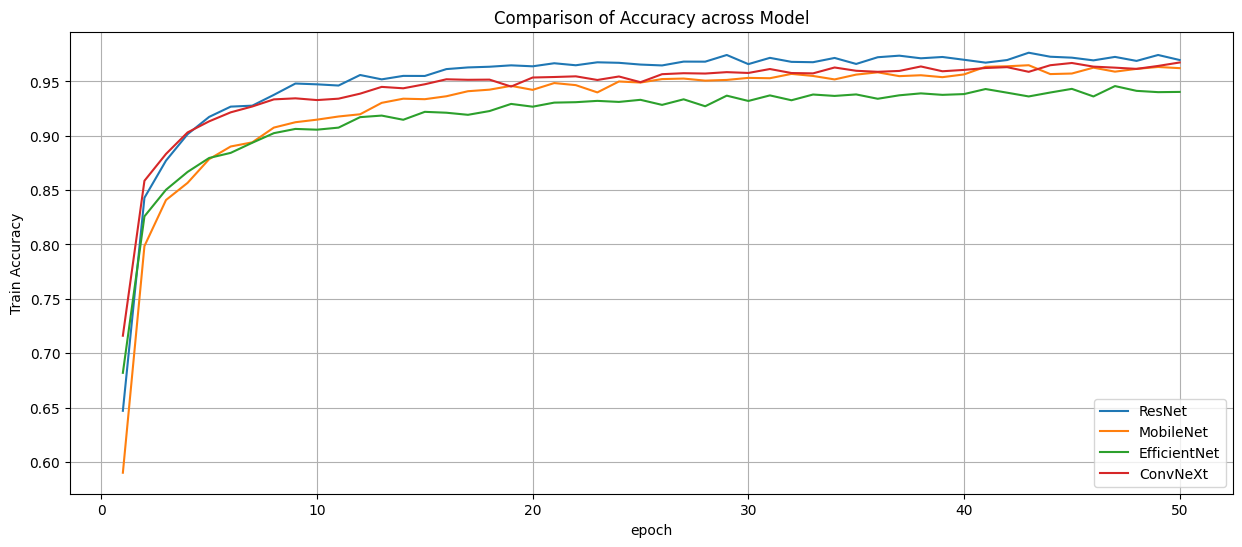

In [ ]:
# 그래프 그리기
plt.figure(figsize=(15, 6))

plt.plot(resnet['epoch'], resnet['Train_acc'], label='ResNet')
plt.plot(mobilenet['epoch'], mobilenet['Train_acc'], label='MobileNet')
plt.plot(efficientnet['epoch'], efficientnet['Train_acc'], label='EfficientNet')
plt.plot(convnext['epoch'], convnext['Train_acc'], label='ConvNeXt')

plt.xlabel('epoch')
plt.ylabel('Train Accuracy')
plt.title('Comparison of Accuracy across Model')
plt.legend()
plt.grid(True)
plt.show();

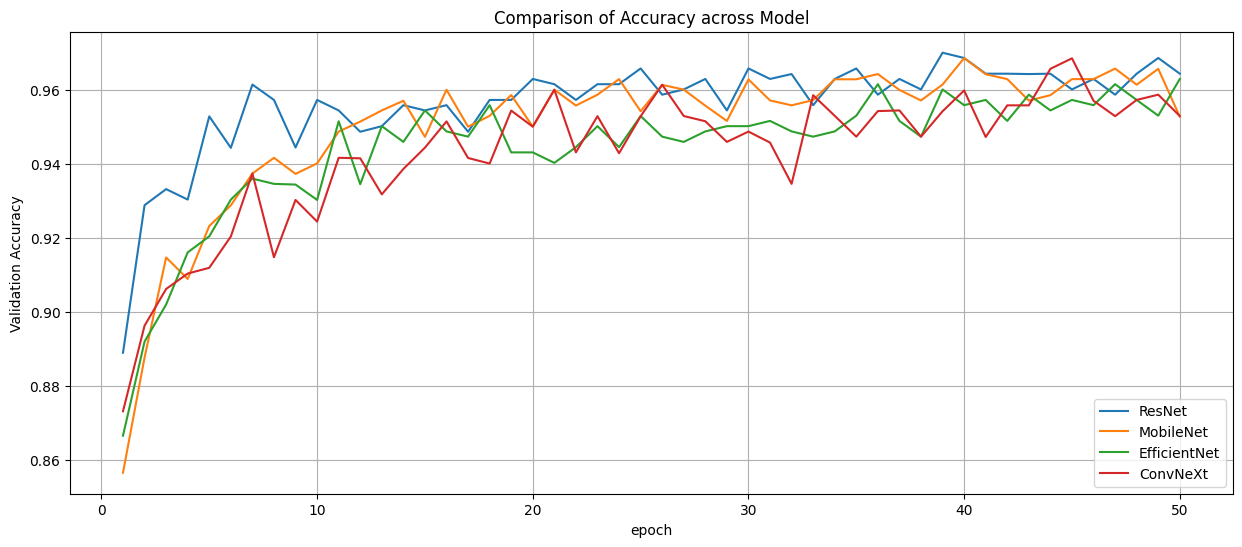

In [ ]:
# 그래프 그리기
plt.figure(figsize=(15, 6))

plt.plot(resnet['epoch'], resnet['Val_acc'], label='ResNet')
plt.plot(mobilenet['epoch'], mobilenet['Val_acc'], label='MobileNet')
plt.plot(efficientnet['epoch'], efficientnet['Val_acc'], label='EfficientNet')
plt.plot(convnext['epoch'], convnext['Val_acc'], label='ConvNeXt')

plt.xlabel('epoch')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Accuracy across Model')
plt.legend()
plt.grid(True)
plt.show();

- validation 모델의 성능이 더 중요: 처음 보는 데이터에 대한 모델의 성능이기에, 모델이 실제로 일반화할 수 있는 능력을 나타낸다.

### 전체 모델 Loss

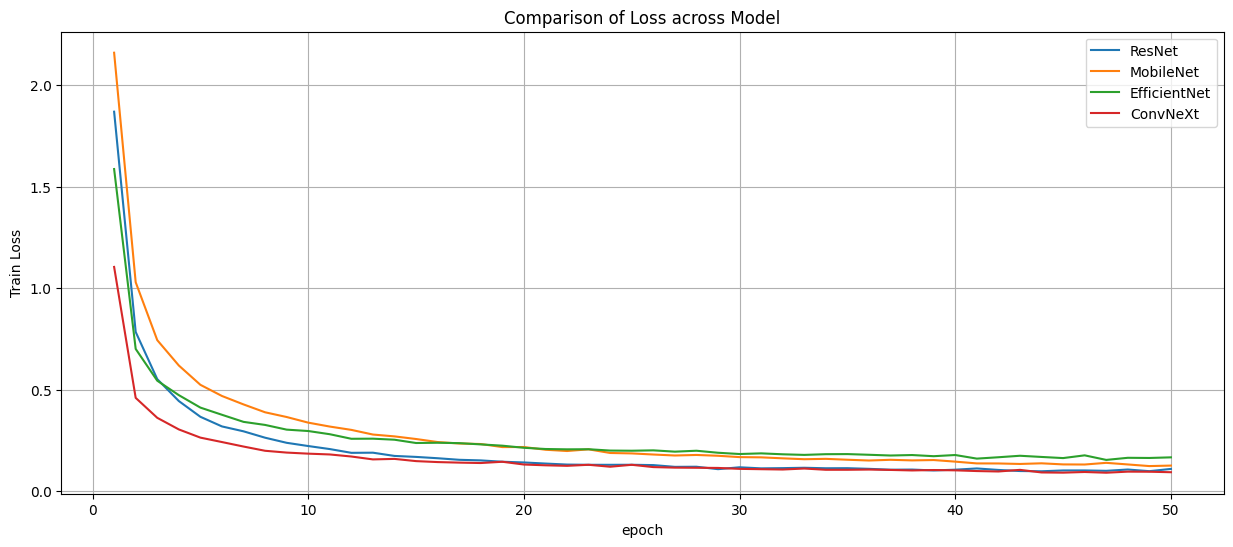

In [ ]:
# 그래프 그리기
plt.figure(figsize=(15, 6))

plt.plot(resnet['epoch'], resnet['Train_loss'], label='ResNet')
plt.plot(mobilenet['epoch'], mobilenet['Train_loss'], label='MobileNet')
plt.plot(efficientnet['epoch'], efficientnet['Train_loss'], label='EfficientNet')
plt.plot(convnext['epoch'], convnext['Train_loss'], label='ConvNeXt')

plt.xlabel('epoch')
plt.ylabel('Train Loss')
plt.title('Comparison of Loss across Model')
plt.legend()
plt.grid(True)
plt.show();

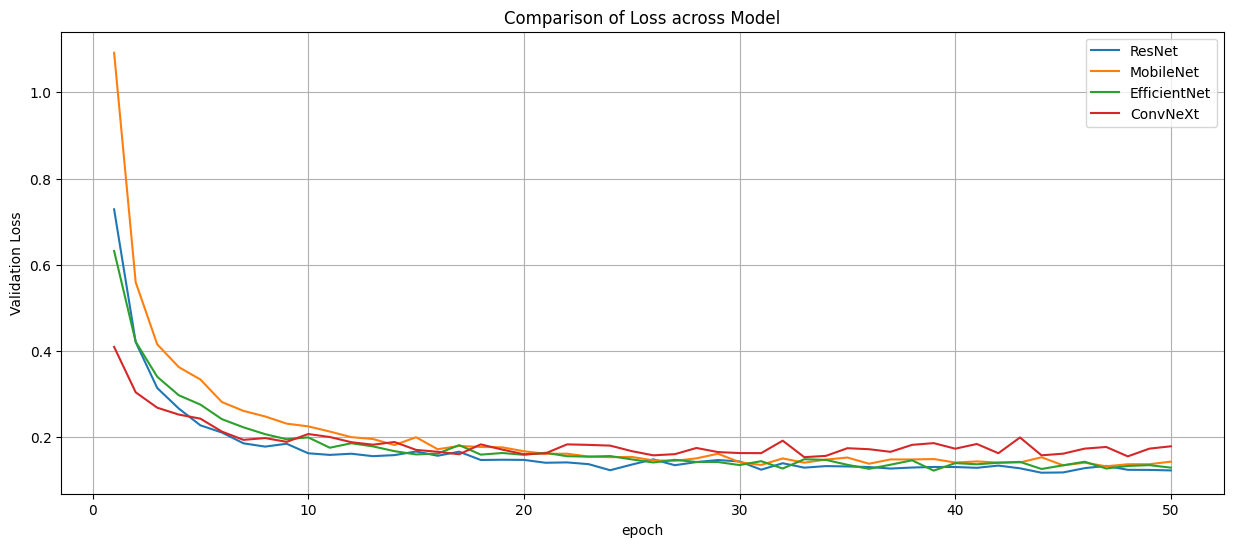

In [ ]:
# 그래프 그리기
plt.figure(figsize=(15, 6))

plt.plot(resnet['epoch'], resnet['Val_loss'], label='ResNet')
plt.plot(mobilenet['epoch'], mobilenet['Val_loss'], label='MobileNet')
plt.plot(efficientnet['epoch'], efficientnet['Val_loss'], label='EfficientNet')
plt.plot(convnext['epoch'], convnext['Val_loss'], label='ConvNeXt')

plt.xlabel('epoch')
plt.ylabel('Validation Loss')
plt.title('Comparison of Loss across Model')
plt.legend()
plt.grid(True)
plt.show();

### ResNet

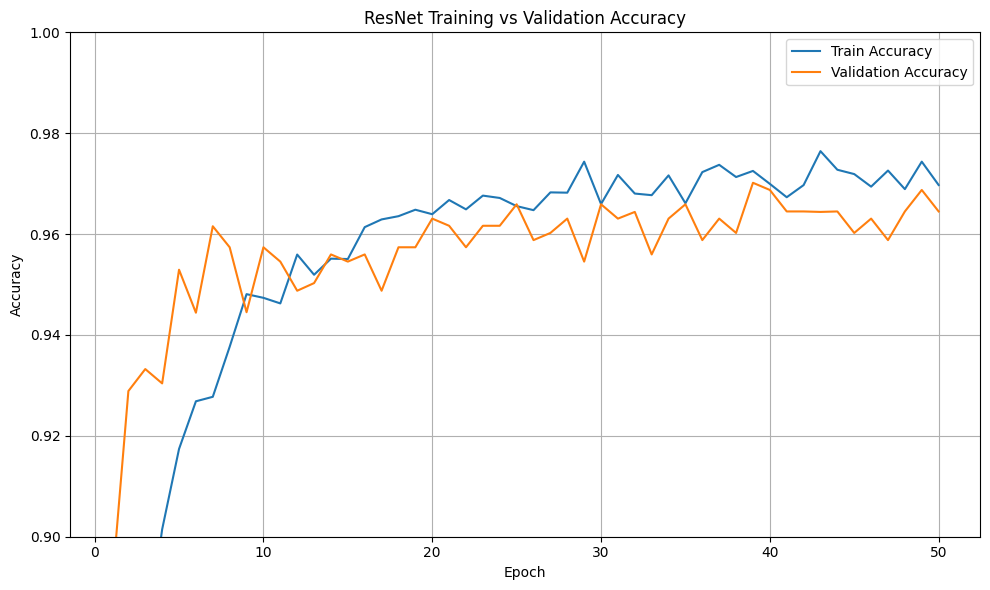

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(resnet['epoch'], resnet['Train_acc'], label='Train Accuracy')
plt.plot(resnet['epoch'], resnet['Val_acc'], label='Validation Accuracy')

plt.title('ResNet Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # 필요 시 조정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

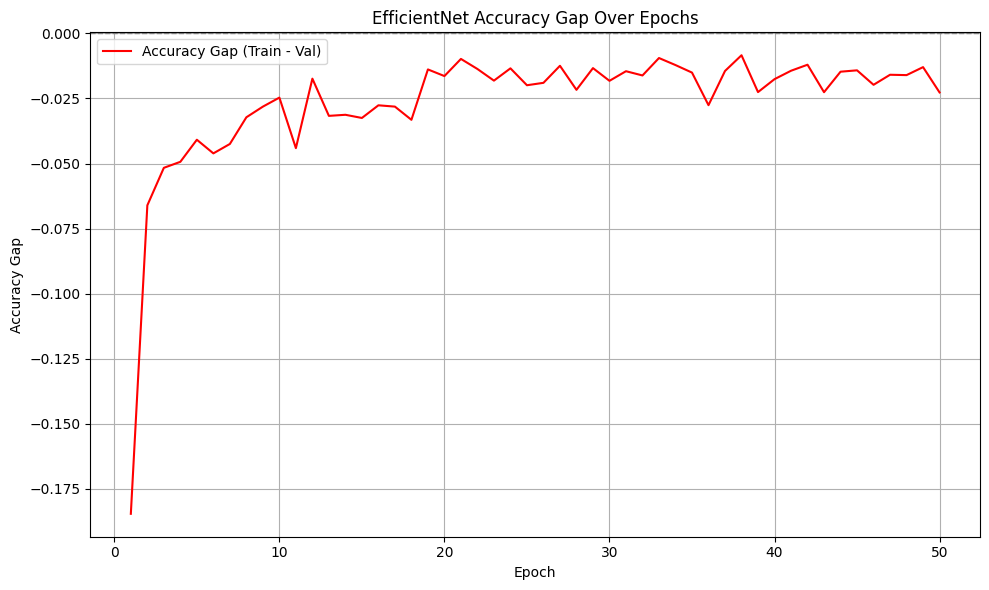

In [ ]:
# Accuracy Gap 컬럼 추가
efficientnet['Accuracy Gap'] = efficientnet['Train_acc'] - efficientnet['Val_acc']

# 최고 Validation Accuracy 시점
best_epoch = efficientnet.loc[efficientnet['Val_acc'].idxmax()]
best_epoch_num = best_epoch['epoch']
best_val_acc = best_epoch['Val_acc']

# 시각화
plt.figure(figsize=(10, 6))

# 2. Accuracy Gap (Train - Val)
plt.plot(efficientnet['epoch'], efficientnet['Accuracy Gap'], label='Accuracy Gap (Train - Val)', color='red')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.title('EfficientNet Accuracy Gap Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Gap')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show();

### EfficientNet

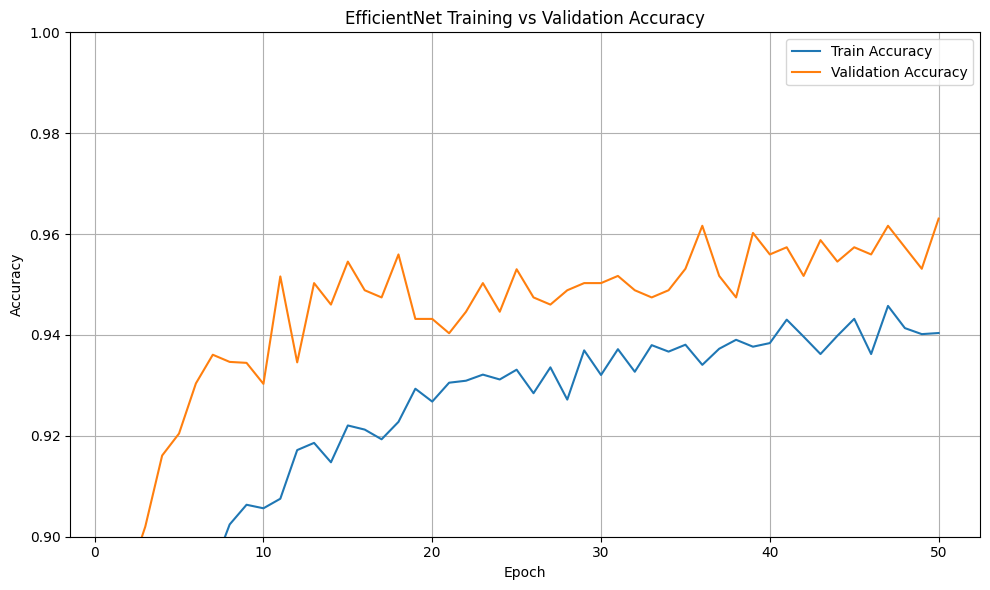

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(efficientnet['epoch'], efficientnet['Train_acc'], label='Train Accuracy')
plt.plot(efficientnet['epoch'], efficientnet['Val_acc'], label='Validation Accuracy')

plt.title('EfficientNet Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # 필요 시 조정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

- Val acc가 지속적으로 훨씬 높음 -> validation 유출(leak) 가능성 확인
- 또는 갑자기 val acc가 급상승 혹은 급하강 반복 -> 불안정한 학습 or 데이터 분할 문제 가능성 있음
- 하지만 위 그래프는 validaion이 초반부터 빠르게 상승한 뒤, 중후반부터는 살짝 들쑥날쑥하지만 큰 변동은 아님, 그리고 전체적으로 0.95~0.97 사이에 안정적인 편

- Gap이 0에 가깝고 안정적이다 -> 모델이 잘 인반화되고 있기에 과적합 가능성이 낮다

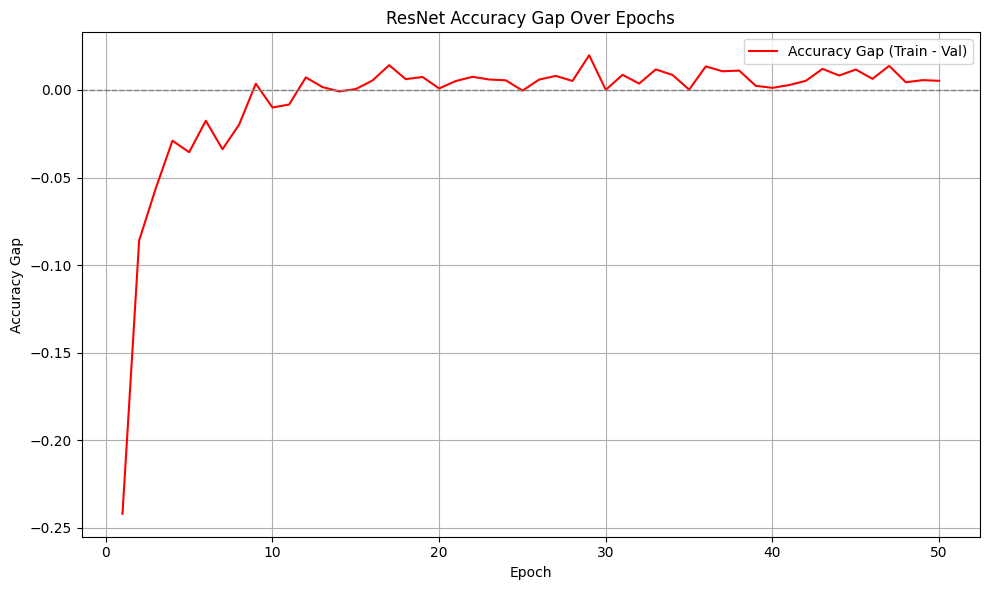

In [ ]:
# Accuracy Gap 컬럼 추가
resnet['Accuracy Gap'] = resnet['Train_acc'] - resnet['Val_acc']

# 최고 Validation Accuracy 시점
best_epoch = resnet.loc[resnet['Val_acc'].idxmax()]
best_epoch_num = best_epoch['epoch']
best_val_acc = best_epoch['Val_acc']

# 시각화
plt.figure(figsize=(10, 6))

# 2. Accuracy Gap (Train - Val)
plt.plot(resnet['epoch'], resnet['Accuracy Gap'], label='Accuracy Gap (Train - Val)', color='red')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.title('ResNet Accuracy Gap Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Gap')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show();

### MobileNet

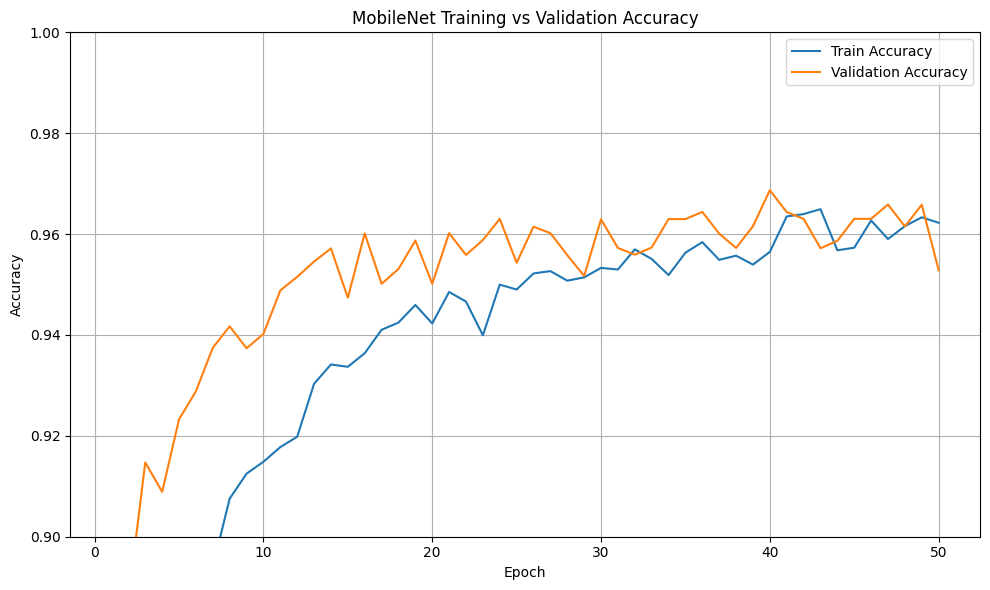

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(mobilenet['epoch'], mobilenet['Train_acc'], label='Train Accuracy')
plt.plot(mobilenet['epoch'], mobilenet['Val_acc'], label='Validation Accuracy')

plt.title('MobileNet Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # 필요 시 조정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

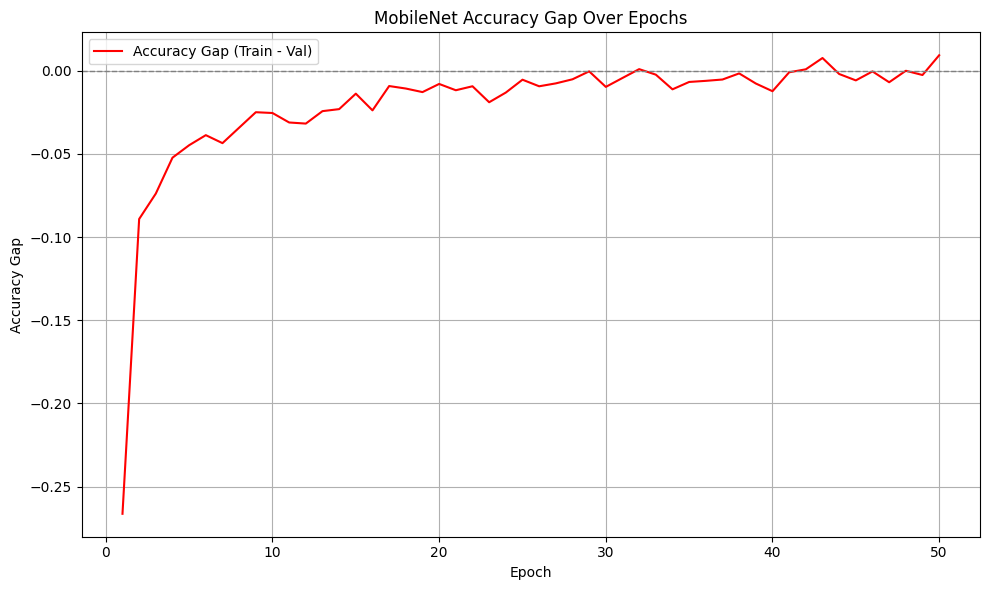

In [ ]:
# Accuracy Gap 컬럼 추가
mobilenet['Accuracy Gap'] = mobilenet['Train_acc'] - mobilenet['Val_acc']

# 최고 Validation Accuracy 시점
best_epoch = mobilenet.loc[mobilenet['Val_acc'].idxmax()]
best_epoch_num = best_epoch['epoch']
best_val_acc = best_epoch['Val_acc']

# 시각화
plt.figure(figsize=(10, 6))

# 2. Accuracy Gap (Train - Val)
plt.plot(mobilenet['epoch'], mobilenet['Accuracy Gap'], label='Accuracy Gap (Train - Val)', color='red')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.title('MobileNet Accuracy Gap Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Gap')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show();

### ConvNeXt

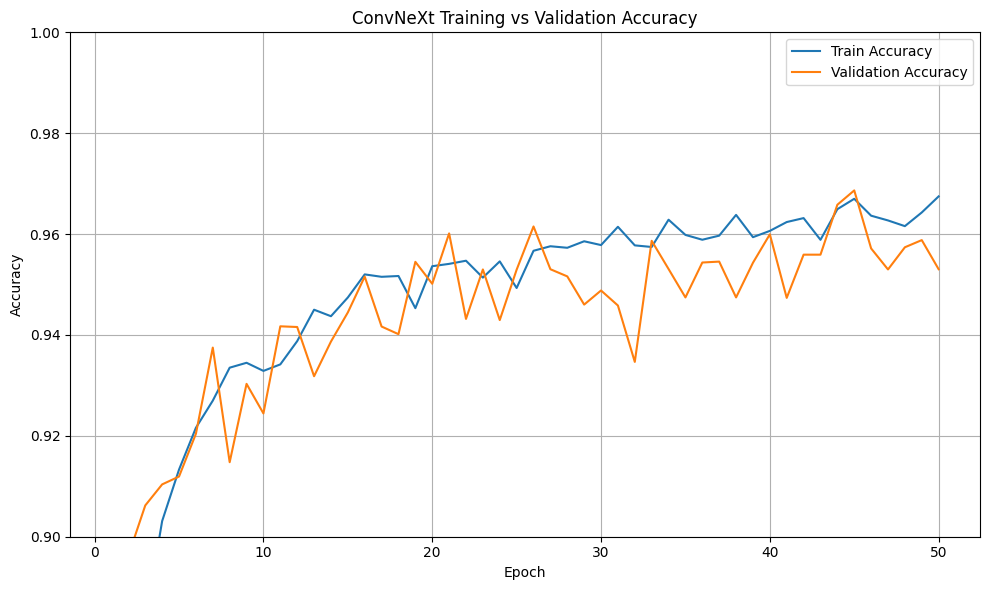

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(convnext['epoch'], convnext['Train_acc'], label='Train Accuracy')
plt.plot(convnext['epoch'], convnext['Val_acc'], label='Validation Accuracy')

plt.title('ConvNeXt Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # 필요 시 조정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

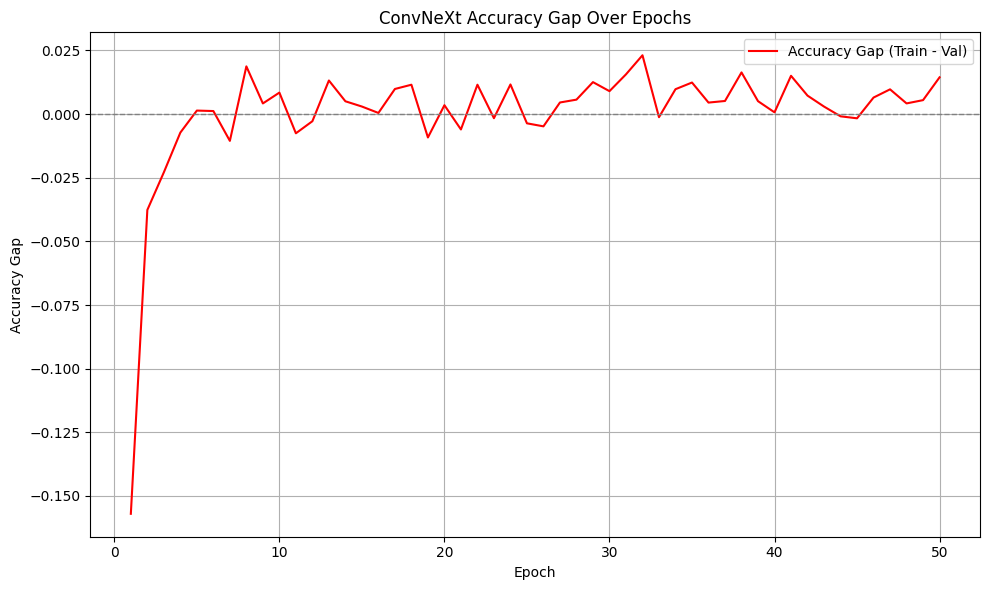

In [ ]:
# Accuracy Gap 컬럼 추가
convnext['Accuracy Gap'] = convnext['Train_acc'] - convnext['Val_acc']

# 최고 Validation Accuracy 시점
best_epoch = convnext.loc[convnext['Val_acc'].idxmax()]
best_epoch_num = best_epoch['epoch']
best_val_acc = best_epoch['Val_acc']

# 시각화
plt.figure(figsize=(10, 6))

# 2. Accuracy Gap (Train - Val)
plt.plot(convnext['epoch'], convnext['Accuracy Gap'], label='Accuracy Gap (Train - Val)', color='red')
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.title('ConvNeXt Accuracy Gap Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Gap')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show();

## 전체 비교

### train

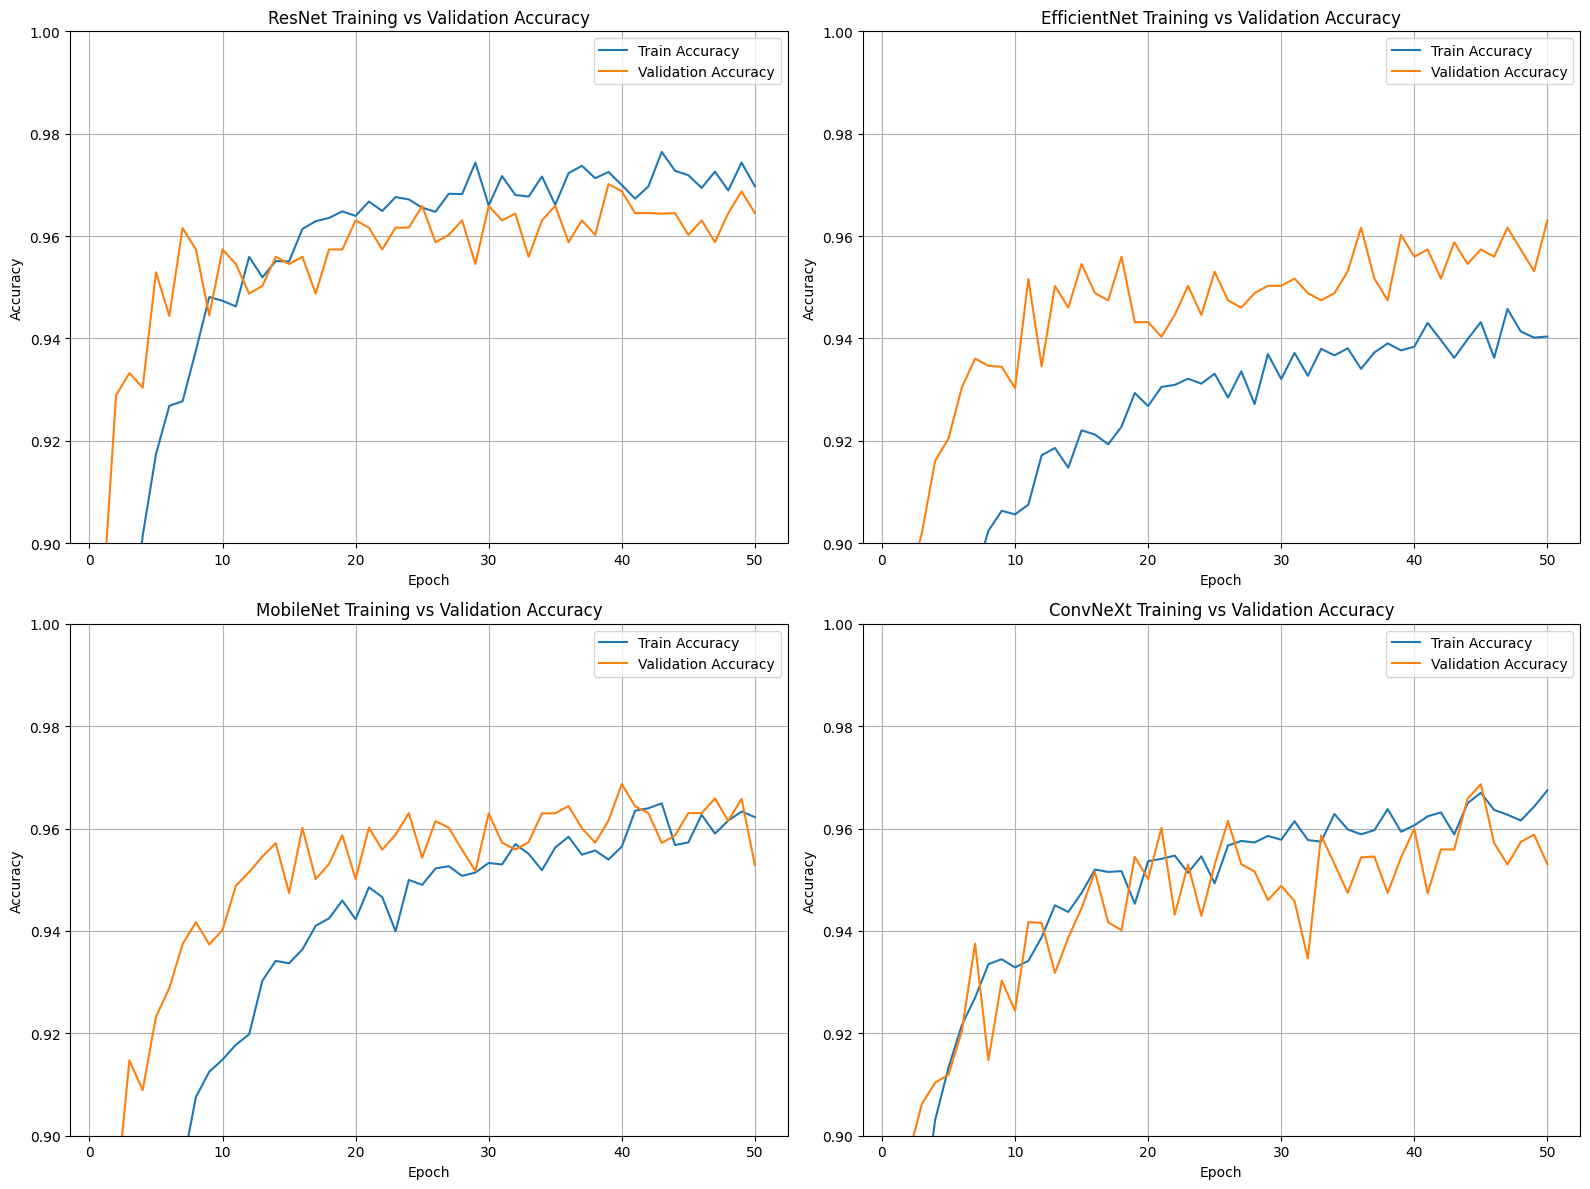

In [ ]:
# 시각화 (2x2 Subplot)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2행 2열, 넉넉한 크기

# ResNet
axes[0, 0].plot(resnet['epoch'], resnet['Train_acc'], label='Train Accuracy')
axes[0, 0].plot(resnet['epoch'], resnet['Val_acc'], label='Validation Accuracy')
axes[0, 0].set_title('ResNet Training vs Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0.9, 1.0)
axes[0, 0].legend()
axes[0, 0].grid(True)

# EfficientNet
axes[0, 1].plot(efficientnet['epoch'], efficientnet['Train_acc'], label='Train Accuracy')
axes[0, 1].plot(efficientnet['epoch'], efficientnet['Val_acc'], label='Validation Accuracy')
axes[0, 1].set_title('EfficientNet Training vs Validation Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_ylim(0.9, 1.0)
axes[0, 1].legend()
axes[0, 1].grid(True)

# MobileNet
axes[1, 0].plot(mobilenet['epoch'], mobilenet['Train_acc'], label='Train Accuracy')
axes[1, 0].plot(mobilenet['epoch'], mobilenet['Val_acc'], label='Validation Accuracy')
axes[1, 0].set_title('MobileNet Training vs Validation Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_ylim(0.9, 1.0)
axes[1, 0].legend()
axes[1, 0].grid(True)

# ConvNeXt
axes[1, 1].plot(convnext['epoch'], convnext['Train_acc'], label='Train Accuracy')
axes[1, 1].plot(convnext['epoch'], convnext['Val_acc'], label='Validation Accuracy')
axes[1, 1].set_title('ConvNeXt Training vs Validation Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim(0.9, 1.0)
axes[1, 1].legend()
axes[1, 1].grid(True)

# 전체 레이아웃 정리
plt.tight_layout()
plt.show()

### test

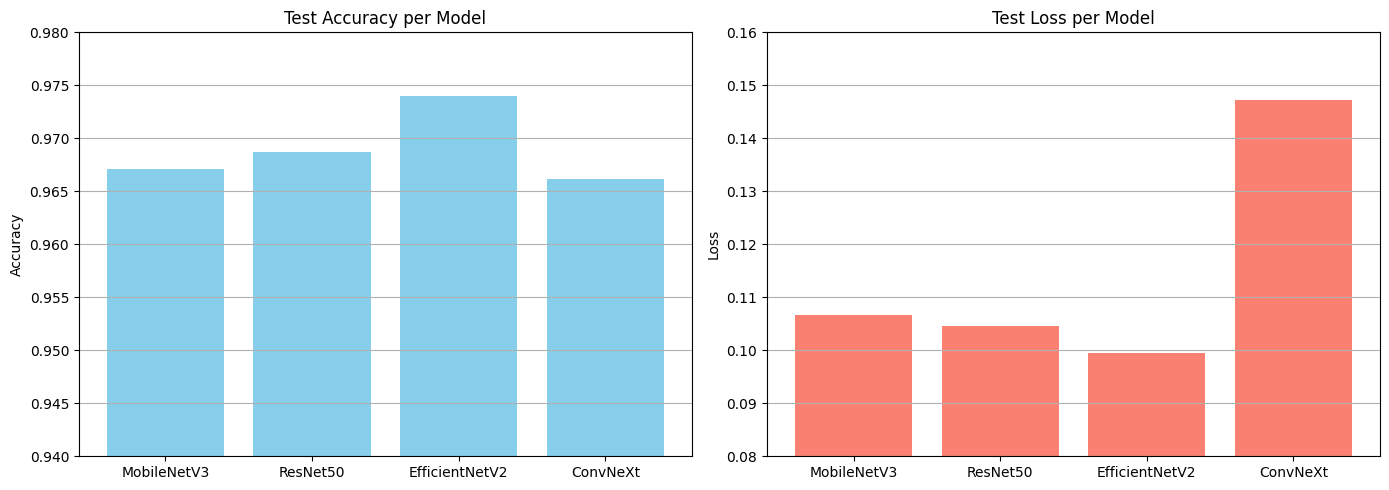

In [ ]:
# 모델 이름, Accuracy, Loss 추출
models = test_result['model_name']
test_acc = test_result['test_acc']
test_loss = test_result['test_loss']

# 1x2 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (1) Test Accuracy 막대그래프
axes[0].bar(models, test_acc, color='skyblue')
axes[0].set_ylim(0.94, 0.98)
axes[0].set_title('Test Accuracy per Model')
axes[0].set_ylabel('Accuracy')
axes[0].grid(axis='y')

# (2) Test Loss 막대그래프
axes[1].bar(models, test_loss, color='salmon')
axes[1].set_ylim(0.08, 0.16)
axes[1].set_title('Test Loss per Model')
axes[1].set_ylabel('Loss')
axes[1].grid(axis='y')

# 전체 레이아웃 정리
plt.tight_layout()
plt.show()